## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization, Activation
from keras.regularizers import l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0, drop_ratio=0.2, pre_active=False):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i==0:
            x = keras.layers.Dense(units=n_units, name='hidden_layer'+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
            if pre_active:
                x = BatchNormalization()(x)
                x = Activation('relu')(x)
            else:
                x = Activation('relu')(x)
                x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units= n_units, name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
            if pre_active:
                x = BatchNormalization()(x)
                x = Activation('relu')(x)
            else:
                x = Activation('relu')(x)
                x = BatchNormalization()(x)
                
    out = keras.layers.Dense(units=output_units, name='output', activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
MOMENTUM = 0.95
BATCH_SIZE = 128
Dropout_EXP = [0.0, 0.2, 0.4]
L1_EXP = [1e-2, 0.0]
L2_EXP = [1e-2, 0.0]

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i,(drop, l1r, l2r) in enumerate(itertools.product(Dropout_EXP, L1_EXP, L2_EXP)):
    keras.backend.clear_session()
    print('Number of exp:%i, dropout_ratio:%.2f, L1:%.3f, L2:%.3f'% (i, drop, l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:],l1_ratio=l1r, l2_ratio=l2r, drop_ratio=drop)
    model.summary()
    
    optimizer = keras.optimizers.Adam(lr= LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs = EPOCHS,
             batch_size= BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    #Collect results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    name_tag = ('exp-%s' %(i))
    results[name_tag]={'train-loss': train_loss, 'val-loss':valid_loss, 'train-acc':train_acc, 'valid-acc':valid_acc}

Number of exp:0, dropout_ratio:0.00, L1:0.010, L2:0.010
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
bat

Epoch 43/50
50000/50000 [==============================] - 31s 624us/step - loss: 4.2280 - accuracy: 0.3451 - val_loss: 5.5178 - val_accuracy: 0.1685
Epoch 44/50
50000/50000 [==============================] - 31s 625us/step - loss: 4.2782 - accuracy: 0.3404 - val_loss: 5.2126 - val_accuracy: 0.1855
Epoch 45/50
50000/50000 [==============================] - 31s 623us/step - loss: 4.2894 - accuracy: 0.3408 - val_loss: 4.6301 - val_accuracy: 0.2414
Epoch 46/50
50000/50000 [==============================] - 31s 619us/step - loss: 4.2100 - accuracy: 0.3461 - val_loss: 4.3587 - val_accuracy: 0.2929
Epoch 47/50
50000/50000 [==============================] - 31s 621us/step - loss: 4.2003 - accuracy: 0.3416 - val_loss: 4.9234 - val_accuracy: 0.2043
Epoch 48/50
50000/50000 [==============================] - 31s 622us/step - loss: 4.1719 - accuracy: 0.3449 - val_loss: 4.8496 - val_accuracy: 0.1866
Epoch 49/50
50000/50000 [==============================] - 31s 615us/step - loss: 4.1918 - accuracy:

Epoch 35/50
50000/50000 [==============================] - 28s 569us/step - loss: 4.1455 - accuracy: 0.3479 - val_loss: 4.3502 - val_accuracy: 0.2700
Epoch 36/50
50000/50000 [==============================] - 28s 568us/step - loss: 4.1427 - accuracy: 0.3418 - val_loss: 4.3870 - val_accuracy: 0.2663
Epoch 37/50
50000/50000 [==============================] - 28s 569us/step - loss: 4.1036 - accuracy: 0.3420 - val_loss: 4.8192 - val_accuracy: 0.2310
Epoch 38/50
50000/50000 [==============================] - 28s 563us/step - loss: 4.0714 - accuracy: 0.3462 - val_loss: 4.3496 - val_accuracy: 0.2372
Epoch 39/50
50000/50000 [==============================] - 29s 580us/step - loss: 4.0831 - accuracy: 0.3453 - val_loss: 5.0824 - val_accuracy: 0.1979
Epoch 40/50
50000/50000 [==============================] - 29s 572us/step - loss: 4.0947 - accuracy: 0.3456 - val_loss: 4.6313 - val_accuracy: 0.2256
Epoch 41/50
50000/50000 [==============================] - 28s 570us/step - loss: 4.0854 - accuracy:

Epoch 27/50
50000/50000 [==============================] - 28s 554us/step - loss: 1.5964 - accuracy: 0.4835 - val_loss: 1.8950 - val_accuracy: 0.3824
Epoch 28/50
50000/50000 [==============================] - 28s 551us/step - loss: 1.5855 - accuracy: 0.4844 - val_loss: 1.9861 - val_accuracy: 0.3749
Epoch 29/50
50000/50000 [==============================] - 28s 555us/step - loss: 1.5914 - accuracy: 0.4845 - val_loss: 2.3911 - val_accuracy: 0.3057
Epoch 30/50
50000/50000 [==============================] - 28s 554us/step - loss: 1.5893 - accuracy: 0.4844 - val_loss: 1.8585 - val_accuracy: 0.3857
Epoch 31/50
50000/50000 [==============================] - 28s 552us/step - loss: 1.5824 - accuracy: 0.4860 - val_loss: 1.6450 - val_accuracy: 0.4637
Epoch 32/50
50000/50000 [==============================] - 29s 585us/step - loss: 1.5827 - accuracy: 0.4866 - val_loss: 1.9112 - val_accuracy: 0.3776
Epoch 33/50
50000/50000 [==============================] - 27s 542us/step - loss: 1.5828 - accuracy:

50000/50000 [==============================] - 24s 480us/step - loss: 0.8526 - accuracy: 0.6972 - val_loss: 1.6016 - val_accuracy: 0.4905
Epoch 19/50
50000/50000 [==============================] - 24s 475us/step - loss: 0.8225 - accuracy: 0.7078 - val_loss: 1.6318 - val_accuracy: 0.4802
Epoch 20/50
50000/50000 [==============================] - 24s 477us/step - loss: 0.8070 - accuracy: 0.7104 - val_loss: 1.7222 - val_accuracy: 0.4598
Epoch 21/50
50000/50000 [==============================] - 24s 477us/step - loss: 0.7762 - accuracy: 0.7254 - val_loss: 1.6812 - val_accuracy: 0.4980
Epoch 22/50
50000/50000 [==============================] - 23s 465us/step - loss: 0.7483 - accuracy: 0.7337 - val_loss: 1.6927 - val_accuracy: 0.4856
Epoch 23/50
50000/50000 [==============================] - 25s 490us/step - loss: 0.7282 - accuracy: 0.7407 - val_loss: 1.7140 - val_accuracy: 0.4864
Epoch 24/50
50000/50000 [==============================] - 24s 481us/step - loss: 0.7060 - accuracy: 0.7488 - va

Epoch 10/50
50000/50000 [==============================] - 30s 595us/step - loss: 4.4993 - accuracy: 0.3313 - val_loss: 5.9048 - val_accuracy: 0.1845
Epoch 11/50
50000/50000 [==============================] - 30s 598us/step - loss: 4.6239 - accuracy: 0.3295 - val_loss: 4.7742 - val_accuracy: 0.2440
Epoch 12/50
50000/50000 [==============================] - 30s 607us/step - loss: 4.5105 - accuracy: 0.3325 - val_loss: 5.2712 - val_accuracy: 0.1514
Epoch 13/50
50000/50000 [==============================] - 30s 607us/step - loss: 4.6139 - accuracy: 0.3322 - val_loss: 6.6008 - val_accuracy: 0.1376
Epoch 14/50
50000/50000 [==============================] - 30s 600us/step - loss: 4.5390 - accuracy: 0.3331 - val_loss: 5.7471 - val_accuracy: 0.1377
Epoch 15/50
50000/50000 [==============================] - 30s 608us/step - loss: 4.5044 - accuracy: 0.3347 - val_loss: 4.7839 - val_accuracy: 0.2353
Epoch 16/50
50000/50000 [==============================] - 30s 606us/step - loss: 4.4037 - accuracy:

Epoch 2/50
50000/50000 [==============================] - 30s 591us/step - loss: 5.9249 - accuracy: 0.2924 - val_loss: 6.7208 - val_accuracy: 0.1667
Epoch 3/50
50000/50000 [==============================] - 30s 595us/step - loss: 5.0767 - accuracy: 0.3110 - val_loss: 5.7421 - val_accuracy: 0.1922
Epoch 4/50
50000/50000 [==============================] - 29s 587us/step - loss: 4.6583 - accuracy: 0.3240 - val_loss: 5.0224 - val_accuracy: 0.1826
Epoch 5/50
50000/50000 [==============================] - 30s 592us/step - loss: 4.5744 - accuracy: 0.3268 - val_loss: 4.9078 - val_accuracy: 0.2534
Epoch 6/50
50000/50000 [==============================] - 30s 600us/step - loss: 4.6192 - accuracy: 0.3315 - val_loss: 5.2286 - val_accuracy: 0.2061
Epoch 7/50
50000/50000 [==============================] - 30s 595us/step - loss: 4.6271 - accuracy: 0.3312 - val_loss: 4.8716 - val_accuracy: 0.2523
Epoch 8/50
50000/50000 [==============================] - 30s 604us/step - loss: 4.5269 - accuracy: 0.3346

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 32s 634us/step - loss: 5.1825 - accuracy: 0.3742 - val_loss: 2.7703 - val_accuracy: 0.2385
Epoch 2/50
50000/50000 [==============================] - 29s 583us/step - loss: 2.1107 - accuracy: 0.3979 - val_loss: 3.6924 - val_accuracy: 0.1521
Epoch 3/50
50000/50000 [==============================] - 30s 595us/step - loss: 1.9393 - accuracy: 0.4077 - val_loss: 4.1282 - val_accuracy: 0.1939
Epoch 4/50
50000/50000 [==============================] - 28s 558us/step - loss: 1.8668 - accuracy: 0.4187 - val_loss: 2.7023 - val_accuracy: 0.2554
Epoch 5/50
50000/50000 [==============================] - 30s 599us/step - loss: 1.8223 - accuracy: 0.4262 - val_loss: 2.2009 - val_accuracy: 0.3120
Epoch 6/50
50000/50000 [==============================] - 29s 585us/step - loss: 1.7904 - accuracy: 0.4350 - val_loss: 2.0800 - val_accuracy: 0.3258
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 25s 501us/step - loss: 1.6872 - accuracy: 0.4026 - val_loss: 1.7322 - val_accuracy: 0.3884
Epoch 2/50
50000/50000 [==============================] - 20s 397us/step - loss: 1.4868 - accuracy: 0.4674 - val_loss: 1.9345 - val_accuracy: 0.3306
Epoch 3/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.4072 - accuracy: 0.4994 - val_loss: 1.7484 - val_accuracy: 0.4101
Epoch 4/50
50000/50000 [==============================] - 21s 426us/step - loss: 1.3434 - accuracy: 0.5238 - val_loss: 1.5739 - val_accuracy: 0.4401
Epoch 5/50
50000/50000 [==============================] - 22s 430us/step - loss: 1.2876 - accuracy: 0.5434 - val_loss: 1.7648 - val_accuracy: 0.3843
Epoch 6/50
50000/50000 [==============================] - 21s 427us/step - loss: 1.2328 - accuracy: 0.5615 - val_loss: 1.4792 - val_accuracy: 0.4851
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 29s 582us/step - loss: 33.6827 - accuracy: 0.2709 - val_loss: 6.5584 - val_accuracy: 0.1638
Epoch 2/50
50000/50000 [==============================] - 27s 543us/step - loss: 5.7932 - accuracy: 0.2911 - val_loss: 5.5839 - val_accuracy: 0.2065
Epoch 3/50
50000/50000 [==============================] - 27s 537us/step - loss: 5.1474 - accuracy: 0.3110 - val_loss: 6.1154 - val_accuracy: 0.1910
Epoch 4/50
50000/50000 [==============================] - 27s 546us/step - loss: 4.7285 - accuracy: 0.3189 - val_loss: 4.8172 - val_accuracy: 0.2606
Epoch 5/50
50000/50000 [==============================] - 24s 486us/step - loss: 4.6594 - accuracy: 0.3224 - val_loss: 4.6003 - val_accuracy: 0.2653
Epoch 6/50
50000/50000 [==============================] - 26s 511us/step - loss: 4.5223 - accuracy: 0.3284 - val_loss: 5.2878 - val_accuracy: 0.1819
Epoch 7/50
50000/50000 [==============================]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 24s 476us/step - loss: 33.4783 - accuracy: 0.2741 - val_loss: 6.4462 - val_accuracy: 0.1774
Epoch 2/50
50000/50000 [==============================] - 23s 463us/step - loss: 5.6069 - accuracy: 0.2950 - val_loss: 7.7574 - val_accuracy: 0.1270
Epoch 3/50
50000/50000 [==============================] - 22s 439us/step - loss: 4.9586 - accuracy: 0.3198 - val_loss: 5.7185 - val_accuracy: 0.1533
Epoch 4/50
50000/50000 [==============================] - 24s 476us/step - loss: 4.6117 - accuracy: 0.3248 - val_loss: 5.1803 - val_accuracy: 0.2212
Epoch 5/50
50000/50000 [==============================] - 23s 450us/step - loss: 4.5696 - accuracy: 0.3265 - val_loss: 5.1682 - val_accuracy: 0.1883
Epoch 6/50
50000/50000 [==============================] - 23s 453us/step - loss: 4.6919 - accuracy: 0.3294 - val_loss: 4.5041 - val_accuracy: 0.2411
Epoch 7/50
50000/50000 [==============================]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 29s 585us/step - loss: 5.2160 - accuracy: 0.3736 - val_loss: 3.1418 - val_accuracy: 0.1741
Epoch 2/50
50000/50000 [==============================] - 24s 480us/step - loss: 2.1022 - accuracy: 0.3997 - val_loss: 3.4293 - val_accuracy: 0.1963
Epoch 3/50
50000/50000 [==============================] - 23s 456us/step - loss: 1.9134 - accuracy: 0.4118 - val_loss: 2.7901 - val_accuracy: 0.1687
Epoch 4/50
50000/50000 [==============================] - 24s 482us/step - loss: 1.8575 - accuracy: 0.4193 - val_loss: 2.8585 - val_accuracy: 0.2051
Epoch 5/50
50000/50000 [==============================] - 23s 457us/step - loss: 1.8075 - accuracy: 0.4320 - val_loss: 2.1244 - val_accuracy: 0.3219
Epoch 6/50
50000/50000 [==============================] - 24s 483us/step - loss: 1.7863 - accuracy: 0.4363 - val_loss: 2.7031 - val_accuracy: 0.1953
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 380us/step - loss: 1.6929 - accuracy: 0.4007 - val_loss: 1.7869 - val_accuracy: 0.3803
Epoch 2/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.4951 - accuracy: 0.4691 - val_loss: 2.1251 - val_accuracy: 0.3219
Epoch 3/50
50000/50000 [==============================] - 18s 357us/step - loss: 1.4101 - accuracy: 0.4973 - val_loss: 1.7038 - val_accuracy: 0.4090
Epoch 4/50
50000/50000 [==============================] - 18s 353us/step - loss: 1.3448 - accuracy: 0.5206 - val_loss: 1.5781 - val_accuracy: 0.4404
Epoch 5/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.2898 - accuracy: 0.5395 - val_loss: 1.8658 - val_accuracy: 0.3690
Epoch 6/50
50000/50000 [==============================] - 20s 397us/step - loss: 1.2380 - accuracy: 0.5591 - val_loss: 1.6232 - val_accuracy: 0.4293
Epoch 7/50
50000/50000 [==============================] 

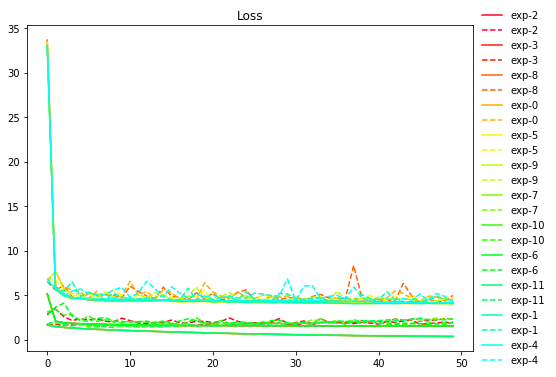

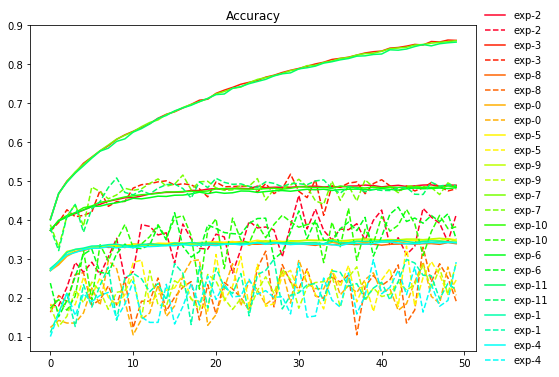

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLOR = 20
#color_bar = ['r', 'g', 'b', 'y', 'm', 'k','gray','purple','orange','brown','pink','olive','cyan','gray']
cm = plt.get_cmap('gist_rainbow')
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLOR-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLOR)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val-loss'])), results[cond]['val-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()